# Logistic Regression

In [1]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

#Machine learning
import sklearn
from sklearn.linear_model import LogisticRegression

#Evaluating ML results
from sklearn import metrics



Logistic Regression is based on Logistic function. The logistic function can take an input from neagtive to positive infinity and it has always an output between 0 and 1 . 

              l(t) = 1/(1+ e^(-t))    where l is logistic function
              
 If we view t as a linear function with a variable x we could express t as:
 
             F(x) = 1/(1+ e^-(b0+b1x))  where t equals to b0+b1(x)  
            
In terms of binary classification we will look into whether it is a success or failure. Inputting the linear regression expression into logistic function allows us to have a linear regression expression values that can vary from postive to nagative infinity, but after the transformation due to logistic expression we will have an output of F(x) that ranges from 0 to 1.

In [2]:
#import from csv
nyc_sub = pd.read_csv('C:/Users/aswat/nyc_subway_weather.csv')

In [3]:
nyc_sub.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,5/1/2011,0:00:00,4388333,2911002,0.0,0.0,5/1/2011 0:00,0.0,6.0,...,30.22,0.0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,5/1/2011,4:00:00,4388333,2911002,0.0,0.0,5/1/2011 4:00,4.0,6.0,...,30.25,0.0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,5/1/2011,12:00:00,4388333,2911002,0.0,0.0,5/1/2011 12:00,12.0,6.0,...,30.28,0.0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,5/1/2011,16:00:00,4388333,2911002,0.0,0.0,5/1/2011 16:00,16.0,6.0,...,30.26,0.0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,5/1/2011,20:00:00,4388333,2911002,0.0,0.0,5/1/2011 20:00,20.0,6.0,...,30.28,0.0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [4]:
nyc_sub.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42647.000000,42647.000000,42647.000000,42647.000000,42648.000000,42648.000000,42648.000000,42648.000000,...,42648.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000
mean,2.812486e+07,1.986993e+07,1886.648862,1361.523859,10.046381,2.905691,0.714430,40.724648,-73.940366,0.009825,...,29.971095,0.224752,63.103735,6.927711,0.004618,29.971097,63.103968,6.927782,40.728558,-73.938698
std,3.043607e+07,2.028986e+07,2952.441710,2183.890279,6.938864,2.079250,0.451691,0.071650,0.059712,0.098632,...,0.137943,0.417424,8.455722,4.510216,0.016345,0.131159,6.939119,3.179879,0.065421,0.059581
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.500000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [5]:
df1 = nyc_sub.copy()
#drop rows with NA
df1.dropna(inplace = True)
df1.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

In [6]:
# Entry Check
def entry_check(x):
    if x!=0:
        return 1
    else:
        return 0

In [7]:
df1['entry_check'] = df1['ENTRIESn_hourly'].apply(entry_check)

In [8]:
df1.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,entry_check
0,R003,5/1/2011,0:00:00,4388333,2911002,0.0,0.0,5/1/2011 0:00,0.0,6.0,...,0.0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177,0
1,R003,5/1/2011,4:00:00,4388333,2911002,0.0,0.0,5/1/2011 4:00,4.0,6.0,...,0.0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177,0
2,R003,5/1/2011,12:00:00,4388333,2911002,0.0,0.0,5/1/2011 12:00,12.0,6.0,...,0.0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177,0
3,R003,5/1/2011,16:00:00,4388333,2911002,0.0,0.0,5/1/2011 16:00,16.0,6.0,...,0.0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177,0
4,R003,5/1/2011,20:00:00,4388333,2911002,0.0,0.0,5/1/2011 20:00,20.0,6.0,...,0.0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177,0


In [9]:
df1.groupby('entry_check').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
entry_check,,,,,,,,,,,,,,,,,,,,,
0,9.049353e+06,5.751097e+06,0.000000,8.599777,9.462653,3.966555,0.400223,40.734365,-73.888802,0.016722,...,29.980892,0.148272,62.890078,7.567781,0.001731,29.976190,63.289240,7.774049,40.736544,-73.889925
1,2.853542e+07,2.017362e+07,1927.183569,1390.591473,10.058922,2.882898,0.721198,40.724440,-73.941476,0.009677,...,29.970888,0.226395,63.108326,6.913959,0.004680,29.970987,63.099988,6.909600,40.728386,-73.939745


Here one could notice that entry is not based on any factors. The entry is sporadic. One could define the entry based on the train timing, which not available.

In [10]:
df1.groupby('rain').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,entry_check
rain,,,,,,,,,,,,,,,,,,,,,
0.0,2.815927e+07,1.990685e+07,1845.612939,1333.156161,10.048878,2.998034,0.682627,40.724499,-73.940373,0.002147,...,29.997086,64.304709,6.560883,0.000008,29.997084,64.305010,6.560974,40.728436,-73.938703,0.976892
1.0,2.800933e+07,1.974410e+07,2028.196035,1459.373918,10.037767,2.587167,0.824204,40.725167,-73.940349,0.036307,...,29.881459,58.961158,8.193031,0.020520,29.881459,58.961158,8.193031,40.728978,-73.938680,0.986124


The rain occurs only during increase in precipitation

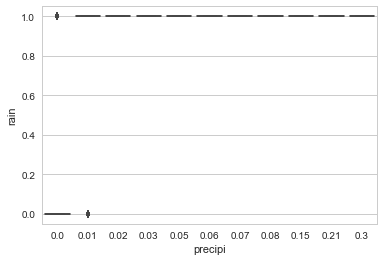

In [34]:
sns.boxplot(x=df1['precipi'],y=df1['rain'])

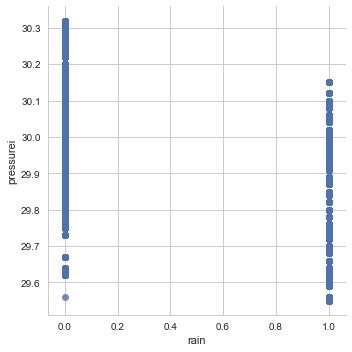

In [39]:
sns.lmplot('rain','pressurei',df1,fit_reg=False)

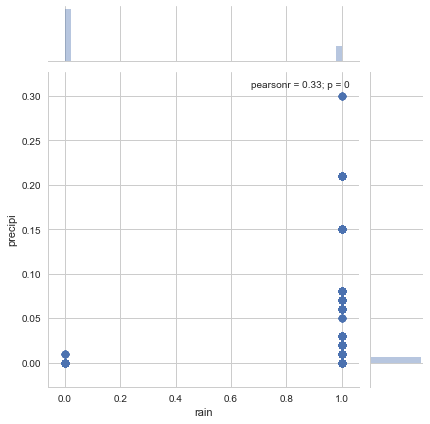

In [36]:
sns.jointplot(df1['rain'],df1['precipi'])

In [12]:
# create a data frame for categorical variables
cond_dummies = pd.get_dummies(df1['conds'])

In [13]:
cond_dummies.head()

,Clear,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
# drop the categorical variables
X = df1.drop(['conds'],axis=1)
X = df1[['hour','day_week','fog','precipi','pressurei','rain','tempi','wspdi']]

In [15]:
X = pd.concat([X,cond_dummies],axis=1)

In [16]:
X.head()

,hour,day_week,fog,precipi,pressurei,rain,tempi,wspdi,Clear,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds
0,0.0,6.0,0.0,0.0,30.22,0.0,55.9,3.5,1,0,0,0,0,0,0,0,0,0,0,0
1,4.0,6.0,0.0,0.0,30.25,0.0,52.0,3.5,0,0,0,0,0,0,0,0,0,1,0,0
2,12.0,6.0,0.0,0.0,30.28,0.0,62.1,6.9,0,0,0,0,0,0,0,1,0,0,0,0
3,16.0,6.0,0.0,0.0,30.26,0.0,57.9,15.0,0,0,0,0,0,0,0,1,0,0,0,0
4,20.0,6.0,0.0,0.0,30.28,0.0,52.0,10.4,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
Y = df1.rain
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rain, dtype: float64

# Multi Collinearity

Multi collinearity could be avoided by removing certain columnn from the dummy, which was just created.

In [18]:
#Dropping clear column
X = X.drop('Clear',axis=1)

In [19]:
#Drop rain since it is target
X= X.drop('rain',axis=1)

In [20]:
X.head()

,hour,day_week,fog,precipi,pressurei,tempi,wspdi,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds
0,0.0,6.0,0.0,0.0,30.22,55.9,3.5,0,0,0,0,0,0,0,0,0,0,0
1,4.0,6.0,0.0,0.0,30.25,52.0,3.5,0,0,0,0,0,0,0,0,1,0,0
2,12.0,6.0,0.0,0.0,30.28,62.1,6.9,0,0,0,0,0,0,1,0,0,0,0
3,16.0,6.0,0.0,0.0,30.26,57.9,15.0,0,0,0,0,0,0,1,0,0,0,0
4,20.0,6.0,0.0,0.0,30.28,52.0,10.4,0,0,0,0,0,0,1,0,0,0,0


In [21]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rain, dtype: float64

Inorder to use this in scikit learn we require 1D array, which could be obtained by using ravel of numpy

In [22]:
Y = np.ravel(Y)

In [23]:
Y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [24]:
logmodel = LogisticRegression()

logmodel.fit(X,Y)

logmodel.score(X,Y)

0.85239289985227562

We got an accuracy of 85.23%. We compare this to original data Y. This is done by taking mean of Y data, since it is in the format of 0 and 1. We could calculate the percentage of whether it rains or not. This is known as Null error rate.

In [25]:
# Check raining or not
Y.mean()

#we conclude 22% that the rain will occur


0.22475203414073675

If our model guessed that no rain then our accuracy should be 1-0.22=.78

# Predictors

In [26]:
coeff_df = DataFrame(list(zip(X.columns,np.transpose(logmodel.coef_))))

In [27]:
coeff_df

,0,1
0,hour,[0.0239506367687]
1,day_week,[-0.061391021881]
2,fog,[0.989017694296]
3,precipi,[2.99878493295]
4,pressurei,[-0.629479407381]
5,tempi,[-0.0264420112166]
6,wspdi,[-0.00819726506288]
7,Fog,[-1.40006911098]
8,Haze,[0.168973625807]
9,Heavy Rain,[5.84972944835]


# Testing and Training

In [28]:
#getting the train and test dataset
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y)

In [30]:
#creating a new object for the logmodel 
logmodel2 = LogisticRegression()

logmodel2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
#predict based on the X_test data

class_predict = logmodel2.predict(X_test)

In [32]:
# preidict the accuracy with the class_predict

metrics.accuracy_score(Y_test,class_predict)

0.85218533108234851

The accuracy could be increased by using non linear models.